In [150]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
c_products=pd.read_csv('cproducts.csv')
#c_tender=pd.read_csv('ctender.csv')

In [151]:
c_products.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,1955-07-21,female,NaN,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,1981-03-19,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback
3,BBID_20499,1986-05-10,male,MAHARASHTRA,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback
4,BBID_204110,1988-02-29,male,MADHYA PRADESH,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback


In [152]:
#replacing values NANA in 'DOB' column with default '2000-01-01' and filling with '2001-01-01'
c_products.DOB=c_products.DOB.replace('NANA',"2000-01-01")
c_products.DOB.fillna("2001-01-01",inplace=True)

In [153]:
import datetime as dt

d = [dt.datetime.strptime(str(s), "%Y-%m-%d") for s in c_products.DOB]

In [154]:
t = [dt.datetime.strptime(str(td), "%Y-%m-%d") for td in c_products.transactionDate]

In [155]:
c_products=c_products.drop(['DOB'],axis=1)
c_products=c_products.drop(['transactionDate'], axis=1)

In [156]:
c_products['day']=[x.day for x in d]

In [157]:
c_products['month']=[x.month for x in d]

In [158]:
c_products['t_day']=[x.day for x in t]
c_products['t_month']=[x.month for x in t]

In [159]:
c_products.head()

,customerID,Gender,State,PinCode,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,day,month,t_day,t_month
0,BBID_20482,male,MADHYA PRADESH,453441.0,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback,20,10,1,5
1,BBID_20485,female,NaN,999999.0,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback,21,7,9,3
2,BBID_20498,female,MAHARASHTRA,400064.0,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,19,3,12,8
3,BBID_20499,male,MAHARASHTRA,400099.0,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,10,5,18,12
4,BBID_204110,male,MADHYA PRADESH,474001.0,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,29,2,31,12


In [160]:
obj_df = c_products.select_dtypes(include=['object']).copy()
obj_df.head()

,customerID,Gender,State,store_description,promo_code,promotion_description,product_description,discountUsed
0,BBID_20482,male,MADHYA PRADESH,BB-INDORE-MALHAR MEGA MALL,NONPROMO,NaN,PATANJALI CHOCOS 125g,Payback
1,BBID_20485,female,NaN,BB-INDORE-MALHAR MEGA MALL,NONPROMO,NaN,SOO FRESH ROLLS HOT DOG 4P,Payback
2,BBID_20498,female,MAHARASHTRA,BB-INDORE-MALHAR MEGA MALL,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",Payback
3,BBID_20499,male,MAHARASHTRA,BB-AMRITSAR-TRILIUM MALL,NONPROMO,NaN,PATANJALI TOMATO KETCHUP BT 500g,Payback
4,BBID_204110,male,MADHYA PRADESH,BB-INDORE-MALHAR MEGA MALL,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,MAGGI NDL MERI MASALA PP 70g,Payback


In [161]:
for col in obj_df.columns:
    c_products[col].fillna(c_products[col].mode()[0], inplace=True)

In [162]:
c_products.head()
c_products['promotion_description'].fillna('no_promo', inplace=True)
c_products['Gender'].fillna('no_gender', inplace=True)
c_products['State'].fillna('no_state', inplace=True)
c_products['PinCode'].fillna(-1, inplace=True)

In [163]:
from sklearn import preprocessing

cols=['Gender','State','store_description','promo_code','promotion_description','product_description','discountUsed']
for col in cols:
    le = preprocessing.LabelEncoder()
    c_products[col]=le.fit_transform(c_products[col])
    

In [164]:
c_products.head()

,customerID,Gender,State,PinCode,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,day,month,t_day,t_month
0,BBID_20482,1,20,453441.0,2655,2,2,85246,2213,72,1000446431,4269,55.00,24,20,10,1,5
1,BBID_20485,0,20,999999.0,2655,2,8,78829,2213,72,1000010431,5121,30.00,24,21,7,9,3
2,BBID_20498,0,21,400064.0,2655,2,13,1064,216,23,1000077851005,1617,418.95,24,19,3,12,8
3,BBID_20499,1,21,400099.0,2615,0,14,51080,2213,72,1000443231,4364,70.00,24,10,5,18,12
4,BBID_204110,1,20,474001.0,2655,2,9,21911,225,1723,300481741,3472,34.20,24,29,2,31,12


In [165]:
#adding column date,month,year of D.O.B
c_products['day']=[x.day for x in d]
c_products['month']=[x.month for x in d]


#adding  column t_date,t_month,t_year of transactionalDate
c_products['t_day']=[x.day for x in t]
c_products['t_month']=[x.month for x in t]


In [175]:
## scaling, creating matrix and running k-means


stores = list(set(c_products['store_code']))

cluster_labels = []
cluster_store = []
cluster_data = []
cluster_customers = []
cluster_score = []

for x in stores:
    cld = c_products[c_products['store_code'] == x]
    cluster_customers.append(cld['customerID'])
    cld.drop(['customerID','product_code','promotion_description'], axis=1, inplace=True)
   
    rbs = RobustScaler()
    cld2 = rbs.fit_transform(cld)
   

    km1 = KMeans(n_clusters=5)
    km2 = km1.fit(cld2)
    label = km2.predict(cld2) #af.labels_ 
    
    s_score = silhouette_score(cld2, label)
    cluster_score.append(s_score)
    
    cluster_labels.append(label)
    cluster_store.append(np.repeat(x, cld.shape[0]))
    cluster_data.append(cld2)


C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Let's visualize the results by plotting the data colored by these labels. 
### We will also plot the cluster centers as determined by the k-means estimator:

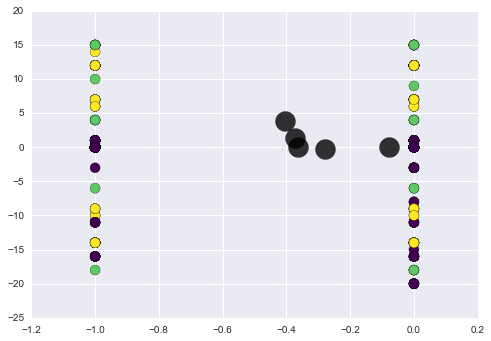

In [184]:
plt.scatter(cld2[:, 0], cld2[:, 1], c=label, s=100, cmap='viridis')

centers = km1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8);

In [177]:
np.mean(cluster_score)


0.94440947804226816

In [178]:
cluster_data = np.concatenate(cluster_data)

In [137]:
cluster_data.shape

(11972, 15)

In [138]:

## convert nested lists as 1d array
cluster_customers = np.concatenate(cluster_customers)
cluster_store = np.concatenate(cluster_store)
cluster_labels = np.concatenate(cluster_labels)

In [139]:
## create submission files
sub1 = pd.DataFrame({'customerID':cluster_customers, 'store_code':cluster_store, 'cluster':cluster_labels})

In [140]:
np.savetxt('subOne_18.txt', cluster_data)
sub1.to_csv('subtwo_18.csv', index=False)

In [185]:
#c_products.product_code.value_counts()
freq=c_products.groupby(['customerID','product_code'])['t_month'].value_counts()


In [186]:
freq

customerID      product_code   t_month
BBID_204100019  300224754      10         1
BBID_204100060  300877866      11         1
BBID_204100090  300785148      10         1
BBID_204100102  300933032      11         1
BBID_20410014   108100312      5          1
                108100331      6          1
BBID_204100149  300196348      4          1
                1000436010004  4          1
BBID_204100150  300362584      11         1
BBID_204100220  108014207      7          1
BBID_204100277  1000067718     11         1
BBID_204100279  108037568      4          1
BBID_204100293  108004880      12         1
BBID_204100310  1000053961     10         1
                1000135637166  10         1
BBID_204100323  108002650      10         1
BBID_204100325  108026497      10         1
BBID_204100336  300577005      11         1
BBID_2041004    108020344      2          1
                300091863      11         1
BBID_204100402  300648532      10         1
BBID_20410046   108027409      6     

In [187]:

count_data=pd.DataFrame(c_products.product_code.value_counts().values,columns=['count'])

In [188]:
count_data

,count
0,96
1,91
2,81
3,71
4,55
5,52
6,52
7,43
8,40
9,39


<IPython.core.display.Javascript object>


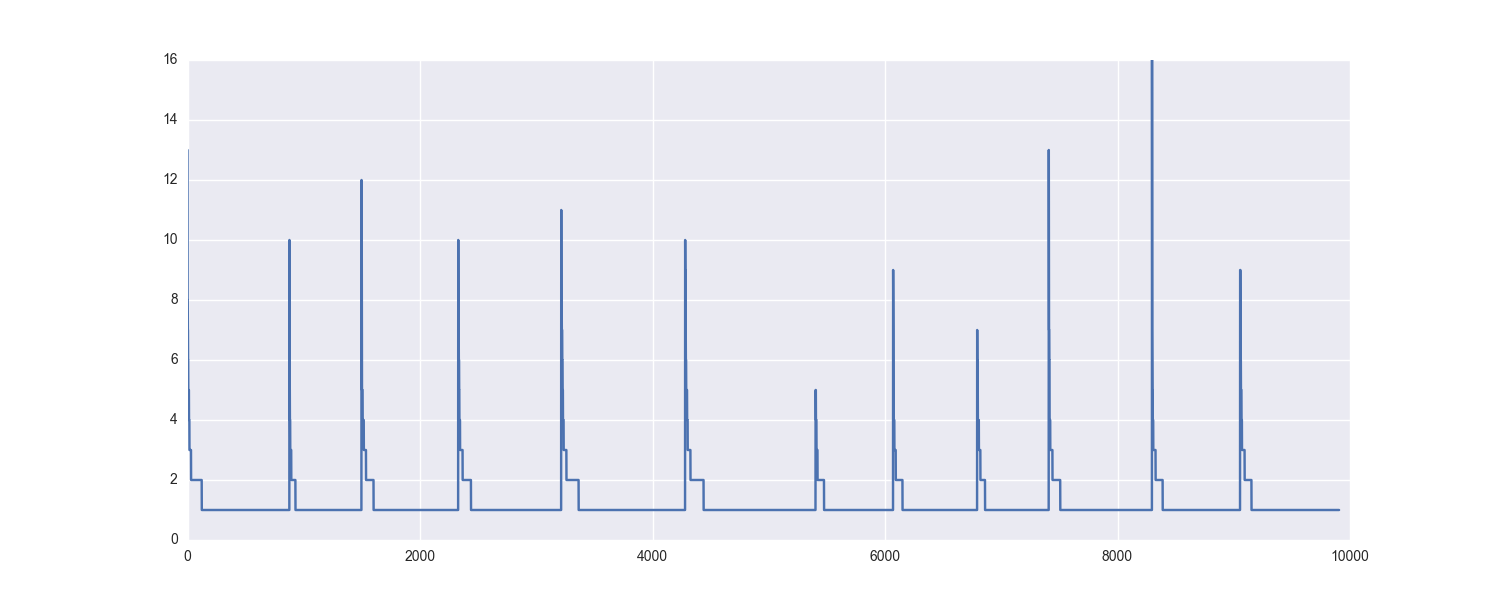

In [126]:
plt.figure(num=None, figsize=(15, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(c_products.groupby(['t_month']).product_code.value_counts().values)

In [156]:
c_products.customerID.value_counts()

BBID_211419317    7
BBID_20470588     6
BBID_20439072     6
BBID_21144074     6
BBID_2041210      6
BBID_20434539     6
BBID_21146233     5
BBID_2114255      5
BBID_20441411     5
BBID_21144506     4
BBID_21146113     4
BBID_211414156    4
BBID_20451964     4
BBID_21148684     4
BBID_20422373     4
BBID_21147114     4
BBID_20427750     4
BBID_211446629    4
BBID_211435645    4
BBID_211415991    4
BBID_21148925     4
BBID_20434705     4
BBID_20461464     4
BBID_21146250     4
BBID_20410117     4
BBID_21142915     4
BBID_21147779     4
BBID_20489936     4
BBID_20413181     4
BBID_20490804     4
                 ..
BBID_211441775    1
BBID_211436974    1
BBID_20432399     1
BBID_20448706     1
BBID_211415381    1
BBID_20487939     1
BBID_20488940     1
BBID_20481772     1
BBID_21141769     1
BBID_211454349    1
BBID_20484063     1
BBID_211449378    1
BBID_21148616     1
BBID_211429538    1
BBID_20444012     1
BBID_20486263     1
BBID_20444556     1
BBID_211458160    1
BBID_20483269     1
